In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
transform =  transforms.ToTensor()

In [3]:
train_data = datasets.CIFAR10( root = r"C:\Users\M1050355", download=True, train= True, transform= transform)

Files already downloaded and verified


In [4]:
test_data = datasets.CIFAR10( root = r"C:\Users\M1050355", download=True, train= False, transform= transform)

Files already downloaded and verified


In [6]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Split: test
    Root Location: C:\Users\M1050355
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [7]:
torch.manual_seed(101)
train_loader = DataLoader(train_data, batch_size= 100, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 100, shuffle=True)

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [9]:
for images,labels in train_loader:
    break

In [10]:
images[0]

tensor([[[0.8588, 0.8078, 0.8196,  ..., 0.7608, 0.7490, 0.7333],
         [0.6588, 0.5647, 0.5765,  ..., 0.4314, 0.4118, 0.3569],
         [0.6118, 0.4745, 0.4902,  ..., 0.3176, 0.3059, 0.2549],
         ...,
         [0.7294, 0.6353, 0.6549,  ..., 0.7216, 0.6392, 0.4353],
         [0.6431, 0.4941, 0.5216,  ..., 0.5451, 0.4706, 0.3529],
         [0.6863, 0.4235, 0.4000,  ..., 0.4196, 0.4000, 0.3961]],

        [[0.8863, 0.8627, 0.8667,  ..., 0.7922, 0.7686, 0.7451],
         [0.7137, 0.6431, 0.6510,  ..., 0.4941, 0.4667, 0.3961],
         [0.6824, 0.5647, 0.5686,  ..., 0.4039, 0.3804, 0.3137],
         ...,
         [0.7686, 0.6784, 0.6902,  ..., 0.0549, 0.0510, 0.1255],
         [0.6745, 0.5216, 0.5451,  ..., 0.0392, 0.0392, 0.1216],
         [0.6941, 0.4314, 0.4000,  ..., 0.2392, 0.2431, 0.3020]],

        [[0.8941, 0.8824, 0.8824,  ..., 0.8157, 0.7843, 0.7529],
         [0.7412, 0.6980, 0.7020,  ..., 0.5451, 0.5098, 0.4314],
         [0.7176, 0.6431, 0.6588,  ..., 0.4706, 0.4392, 0.

In [11]:
images[0].shape

torch.Size([3, 32, 32])

In [13]:
labels[0]

tensor(3)

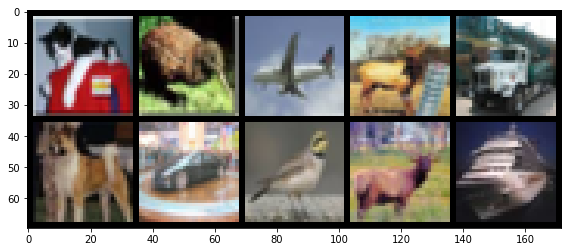

In [14]:
im = make_grid(images[0:10], nrow= 5)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0))) 

In [15]:
labels[0:10]

tensor([3, 2, 0, 4, 9, 5, 1, 2, 4, 8])

In [ ]:
images.shape

# Stride in filter

<img src ='Stridepause.JPG' >

<img src ='stride1.gif' >

<img src ='img1.gif' >

<img src ='Convolution layer.gif' >

## Padding in CNN

<img src ='img2.gif' >

## Pooling - To downsample

<img src ='max pooling.png' >

In [ ]:
# Types of pooling - Max pooling, avg pooling

In [ ]:
# Types of filter

<img src ='CNNlayers.png' >

In [ ]:
class convCIFAR(nn.Module):
    def __init__ (self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3,6,5,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(6*6*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        x = x.view(-1,6*6*16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x),dim = 1)
        return(x)

In [ ]:
for i , (X_train,y_train) in enumerate(train_data):
    break


In [ ]:
x = X_train.view(-1,3,32,32)

In [ ]:
x.shape

In [ ]:
nn.Conv2d()

In [ ]:
conv1 = nn.Conv2d(3,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)

In [ ]:
X  = conv1(x)

In [ ]:
X.shape

In [ ]:
X = F.max_pool2d(X,2,2)

In [ ]:
X.shape

In [ ]:
X  = F.relu(conv2(X))

In [ ]:
X.shape

In [ ]:
X = F.max_pool2d(X,2,2)

In [ ]:
X.shape

In [ ]:
model = convCIFAR()

In [ ]:
for params in model.parameters():
    print(params.numel())

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%100 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/50000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)


In [ ]:
import torch.nn as nn

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = torch.linspace(0,799,800)

In [ ]:
y = torch.sin(x*2*3.1416/40)

In [ ]:
plt.xlim(-10,800)
plt.plot(y.numpy())

In [ ]:
test_size = 40

In [ ]:
train_set = y[:-test_size]

In [ ]:
test_set = y[-test_size:]

In [ ]:
class LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_size = 50
        self.lstm = nn.LSTM(1,50)
        self.linear = nn.Linear(1,50)
        self.hidden = (torch.zeros(1,1,50),torch.zeros(1,1,50))
        
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1),self.hidden)
        
        pred = self.linear(lstm_out.view(len(seq),-1))
        
        return pred[-1]
        